Импорт библиотек

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Всего датасет содержит 159 записей. Мы предварительно зарезервировали часть датасета для задания по преодолению бейслайна (baseline). В настоящем задании подразумевается работа с датасетом, содержащим 119 записей.

# 0. Применение полиномиальной регрессии для предсказания непрерывного параметра

Представленный набор данных — это набор данных о семи различных типах рыб, продаваемых в некоторой рыбной лавке. Наша цель заключается в том, чтобы предсказать массу рыбы по каким-то косвенным признакам, известным о рыбе. Сами признаки, быть может, нужно синтезировать из тех, что известны.

При помощи <code>train_test_split()</code> разбейте набор данных на обучающую и тестовую выборки с параметрами, указанными в вашем задании. Используйте стратификацию по колонке <code>Species</code>. Стратификация позволит сохранить доли представленных объектов (по представителям типов рыб) в тренировочной и тестовой выборках.

In [ ]:
from numpy import test
#
data = pd.read_csv('Datasets/fish_train.csv', index_col=False, header=0)

train, test = train_test_split(data, test_size=0.2,
                               random_state=23, stratify=data[["Species"]])

X_train = train[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
Y_train = train[['Weight']]

X_test = test[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
Y_test = test[['Weight']]



In [ ]:
print(train)

    Species  Weight  Length1  Length2  Length3   Height   Width
84    Smelt     9.8     11.4     12.0     13.2   2.2044  1.1484
32    Roach   290.0     24.0     26.0     29.2   8.8768  4.4968
82     Pike  1550.0     56.0     60.0     64.0   9.6000  6.1440
3     Bream   925.0     36.2     39.5     45.3  18.7542  6.7497
24    Bream   500.0     28.7     31.0     36.2  14.3714  4.8146
..      ...     ...      ...      ...      ...      ...     ...
60     Pike   540.0     40.1     43.0     45.8   7.7860  5.1296
112   Perch   690.0     34.6     37.0     39.3  10.5717  6.3666
42    Perch   145.0     20.7     22.7     24.2   5.9532  3.6300
63    Perch   125.0     19.0     21.0     22.5   5.6925  3.6675
2     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340

[95 rows x 7 columns]


Вычислите выборочное среднее колонки <code>Width</code> полученной тренировочной выборки.

In [ ]:
print('Выборочное среднее:', train.mean(axis=0))

Выборочное среднее: Weight     390.833684
Length1     26.168421
Length2     28.329474
Length3     31.129474
Height       8.975294
Width        4.448602
dtype: float64


<ipython-input-48-0add3bf42f2f>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('Выборочное среднее:', train.mean(axis=0))


# 1. Построение базовой модели

Избавьтесь от категориальных признаков и обучите модель линейной регрессии (<code>LinearRegression()</code>) на тренировочном наборе данных. Выполните предсказания для тестового набора данных. Оцените модель при помощи метрики <code>r2_score()</code>.

In [ ]:
# < ENTER YOUR CODE HERE >
# Создаем модель
model = LinearRegression()

# Совмещение модели
model.fit(X_train, Y_train)

y_true = Y_test
y_pred = model.predict(X_test)

r2 = r2_score(y_true, y_pred)

print('r2 score = ', r2)

r2 score =  0.8885408749541969


# 2. Добавление предварительной обработки признаков.

## Использование PCA

При помощи, например, <code>sns.heatmap()</code>, постройте матрицу корреляций признаков тренировочного набора данных и определите тройку наиболее коррелированных между собой признаков.

<ipython-input-4-91fd42cf8ecd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot = True, fmt='.2g')


<Axes: >

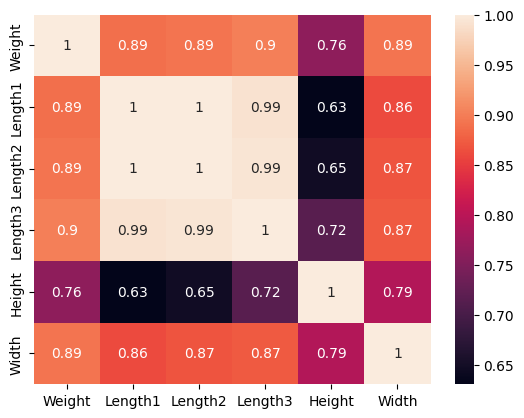

In [ ]:
# < ENTER YOUR CODE HERE >
sns.heatmap(train.corr(), annot = True, fmt='.2g')

Линейные модели достаточно плохо реагируют на коррелированные признаки, поэтому от таких признаков имеет смысл избавиться еще до начала обучения.

Для уменьшения количества неинформативных измерений используйте метод главных компонент.

1) Примените метод главных компонент (<code>PCA(n_components=3, svd_solver='full')</code>) для трех найденных наиболее коррелированных признаков.

2) Вычислите долю объясненной дисперсии при использовании только первой главной компоненты.

3) Замените три наиболее коррелированных признака на новый признак <code>Lengths</code>, значения которого совпадают со значениями счетов первой главной компоненты.

In [ ]:
# < ENTER YOUR CODE HERE >

#создается PCA
pca = PCA(n_components=3, svd_solver='full')

x3 = X_train[['Length1', 'Length2', 'Length3']]

#
pca.fit(x3)

# Преобразование данных с помощью PCA
new_x3 = pca.transform(x3)

# получение доли объясненой дисперсии
explained_var_ratio_1 = pca.explained_variance_ratio_[0]

print("Доля объясненной дисперсии для первой главной компоненты:", explained_var_ratio_1)

new_length = new_x3[:, 0]
print(new_length)

new_X_train = X_train[['Height', 'Width']]
new_X_train['Lengths'] = new_length


print(new_X_train)


Доля объясненной дисперсии для первой главной компоненты: 0.9960410310578471
[-2.83888965e+01 -3.69350201e+00  5.45162318e+01  2.05627148e+01
  6.02998760e+00  1.92429082e+00 -2.61473379e+00  2.84974788e+01
  1.43255006e+01  1.10562976e+01  1.45616637e+01  6.11644725e+00
 -3.29093369e+00 -1.07050690e+01 -9.02118074e+00 -1.71669659e+00
 -1.34928365e+01  1.72170515e+01 -3.52693635e+01 -3.36674746e-02
 -1.53233814e+01 -1.30811767e+01 -1.77003726e+01  1.95964252e+01
  9.51324060e+00 -1.43488595e+01 -3.02417738e+01 -2.26894396e+00
  1.37591532e+01  1.63525769e+01 -2.94836843e+01  2.30627751e+01
 -3.61485405e+00 -1.16626878e+01 -2.22249010e+01 -1.16626878e+01
  3.33735056e+00 -7.80573074e+00 -2.28260550e+00  1.10418013e+01
  7.59839925e+00  4.18556187e+00  1.30383130e+01  5.75070755e+00
 -1.97031726e+01  1.80195620e+01 -1.33916369e+01 -2.26894396e+00
 -1.33916369e+01 -2.26894396e+00 -4.21737234e+00  5.86945009e+00
  9.38931247e+00 -1.40446938e+00 -9.99268032e+00  1.28190530e+01
 -2.45215017e

<ipython-input-5-d5c316c98a85>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_X_train['Lengths'] = new_length


Примените полученное преобразование для тех же признаков в тестовом наборе данных. Обратите внимание, что заново обучать преобразование `PCA` не нужно. Аналогично предыдущему этапу замените три рассмотренных признака на один.

In [ ]:
x3_test = X_test[['Length1', 'Length2', 'Length3']]


# Преобразование данных с помощью PCA
new_x3_test = pca.transform(x3_test)

# получение доли объясненой дисперсии
explained_var_ratio_1 = pca.explained_variance_ratio_[0]

print("Доля объясненной дисперсии для первой главной компоненты:", explained_var_ratio_1)

new_length = new_x3_test[:, 0]
print(new_length)

new_X_test = X_test[['Height', 'Width']]
new_X_test['Lengths'] = new_length


print(new_X_train)

Доля объясненной дисперсии для первой главной компоненты: 0.9960410310578471
[ 13.91298171  24.44266843  -9.85749751   6.65505747  -3.81743014
  24.78327268   6.66353343  -5.54637929 -10.79821317  10.24533548
  -7.15140032 -18.65735157  40.11524443  -5.55394736  47.414543
  -7.10545588  18.54084846  -9.06926402  12.70357642  25.43369726
 -28.61920977 -28.61920977 -10.89941272   7.71387582]
      Height   Width    Lengths
84    2.2044  1.1484 -28.388897
32    8.8768  4.4968  -3.693502
82    9.6000  6.1440  54.516232
3    18.7542  6.7497  20.562715
24   14.3714  4.8146   6.029988
..       ...     ...        ...
60    7.7860  5.1296  24.969165
112  10.5717  6.3666  14.553212
42    5.9532  3.6300 -10.452423
63    5.6925  3.6675 -13.391637
2    12.4440  5.1340   2.341136

[95 rows x 3 columns]


<ipython-input-6-8c3cd4d6f957>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_X_test['Lengths'] = new_length


Обучите базовую модель линейной регресси на полученных тренировочных данных, снова выбросив категориальные признаки. Выполните предсказания для тестовых данных, оцените при помощи <code>r2_score()</code>.

In [ ]:
# Совмещение модели
model.fit(new_X_train, Y_train)

y_pred = model.predict(new_X_test)

r2 = r2_score(y_true, y_pred)

print('r2 score = ', r2)


r2 score =  0.8925481416058356


Видно, что точность значительно не изменилась.

## Модификация признаков

Постройте графики зависимостей признаков от целевой переменной, например, при помощи <code>sns.pairplot()</code>.

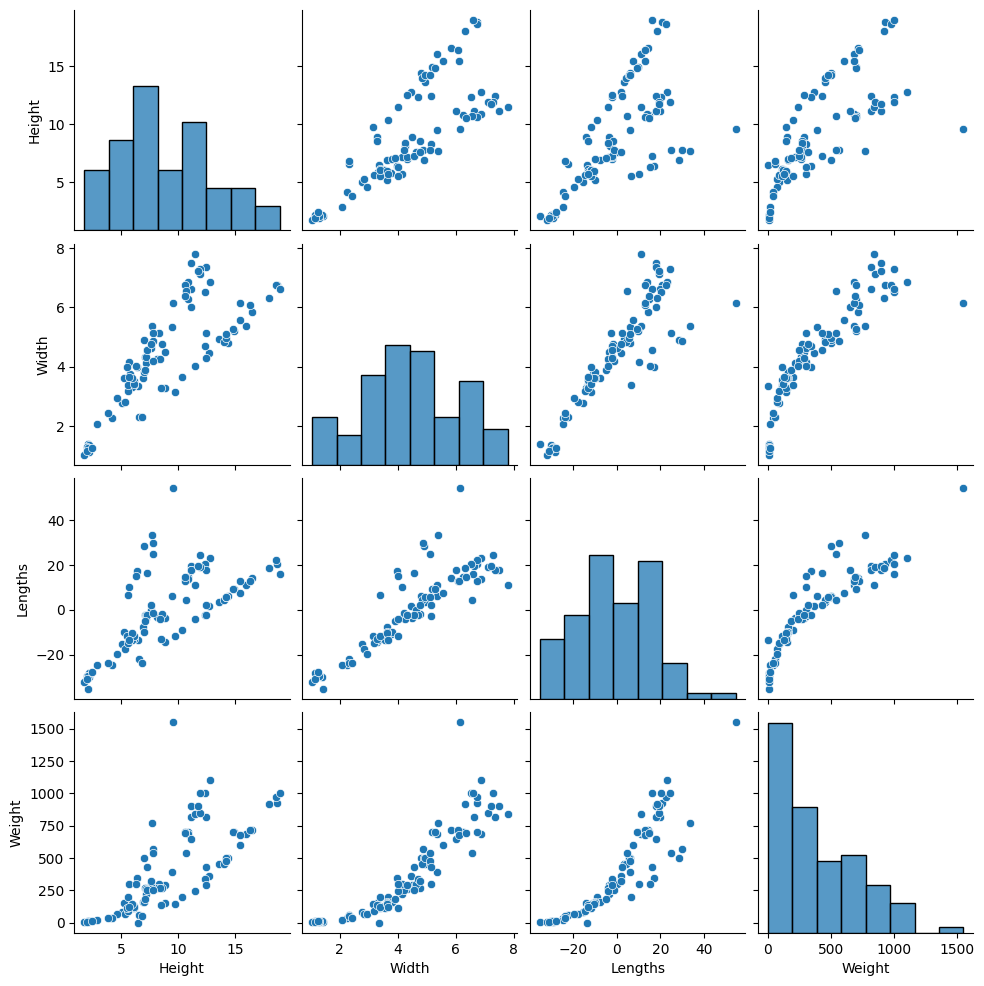

In [ ]:
temporary = new_X_train.copy()
temporary['Weight'] = Y_train

sns.pairplot(temporary)

Видно, что масса, вообще говоря, нелинейно зависит от остальных параметров. Значит, чтобы линейная модель хорошо справлялась с предсказанием, признаки имеет смысл преобразовать так, чтобы зависимость стала более похожей на линейную. Но как придумать такую зависимость?

Логично предположить, что масса рыбы должна каким-то гладким образом зависеть от остальных параметров, отвечающих так или иначе за размеры. Если впомнить, что масса — это произведение плотности на объем, то

$$
m = \rho \cdot V.
$$

Допустим, что средняя плотность у всех рыб одинаковая, и вспомним, что при гомотетии объем объекта зависит от линейных размеров как куб, тогда получим

$$
m\sim V\sim d^3
$$

Все признаки тренировочного и тестового наборов данных, отвечающие так или иначе за размеры (<code>Height, Width, Lengths</code>), возведите в третью степень, и проверьте, стала ли зависимость массы от этих признаков похожа на линейную.

<ipython-input-9-8a8377838a74>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_X_train['Height'] =  new_X_train['Height'] * new_X_train['Height'] * new_X_train['Height']
<ipython-input-9-8a8377838a74>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_X_train['Width'] =  new_X_train['Width'] * new_X_train['Width'] * new_X_train['Width']
<ipython-input-9-8a8377838a74>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

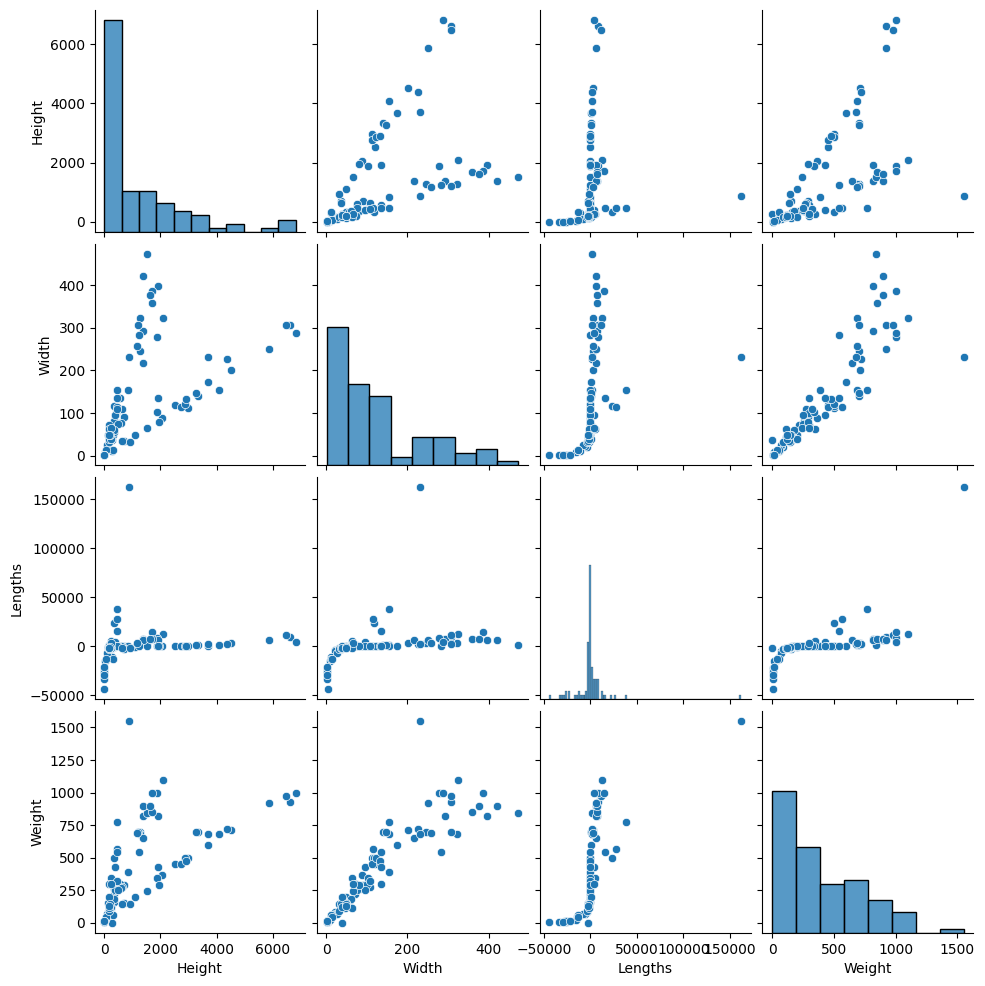

In [ ]:
# < ENTER YOUR CODE HERE >
new_X_train['Height'] =  new_X_train['Height'] * new_X_train['Height'] * new_X_train['Height']
new_X_train['Width'] =  new_X_train['Width'] * new_X_train['Width'] * new_X_train['Width']
new_X_train['Lengths'] =  new_X_train['Lengths'] * new_X_train['Lengths'] * new_X_train['Lengths']

new_X_test['Height'] =  new_X_test['Height'] * new_X_test['Height'] * new_X_test['Height']
new_X_test['Width'] =  new_X_test['Width'] * new_X_test['Width'] * new_X_test['Width']
new_X_test['Lengths'] =  new_X_test['Lengths'] * new_X_test['Lengths'] * new_X_test['Lengths']

temporary = new_X_train.copy()
temporary['Weight'] = Y_train

sns.pairplot(temporary)

Введите выборочное среднее колонки <code>Width</code> тренировочного набора данных после возведения в куб.

In [ ]:
print('Выборочное среднее:', new_X_train.mean(axis=0))

Выборочное среднее: Height     1238.383597
Width       124.418401
Lengths     637.108332
dtype: float64


Выберите изображения, соответствующие зависимости <code>Weight</code> от <code>Width</code> до преобразования и после.

Обучите базовую модель линейной регресси на полученных тренировочных данных, снова выбросив категориальные признаки. Выполните предсказания для тестовых данных, оцените при помощи `r2_score()`.

In [ ]:
# Совмещение модели
model.fit(new_X_train, Y_train)

y_pred = model.predict(new_X_test)

r2 = r2_score(y_true, y_pred)

print('r2 score = ', r2)

r2 score =  0.9452890309259351


Обратите внимание на то, как такая нехитрая работа с признаками помогла разительно улучшить точность модели!

## Добавление категориальных признаков

Произведите <code>one-hot</code> кодировние категориального признака `Species`, например, с помощью <code>pd.get_dummies()</code>.

Обучите модель линейной регресси на полученных тренировочных данных. Выполните предсказания для тестовых данных, оцените модель при помощи <code>r2_score()</code>.

<b>Примечание</b>: Мы специально использовали стратифицированное разделение, чтобы все значения категориального признака <code>Species</code> присутствовали во всех наборах данных. Но такое возможно не всегда. Про то, как с этим бороться можно почитать, [например, здесь](https://predictivehacks.com/?all-tips=how-to-deal-with-get_dummies-in-train-and-test-dataset).

In [ ]:
new_X_train['Species'] = train[['Species']]
new_X_test['Species'] = test[['Species']]

result_X_train = pd.get_dummies(new_X_train, columns=['Species'])
result_X_test = pd.get_dummies(new_X_test, columns=['Species'])

# Совмещение модели
model.fit(result_X_train, Y_train)

y_pred = model.predict(result_X_test)

r2 = r2_score(y_true, y_pred)

print('r2 score = ', r2)

r2 score =  0.952571372463946


<ipython-input-12-87ad94de60ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_X_train['Species'] = train[['Species']]
<ipython-input-12-87ad94de60ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_X_test['Species'] = test[['Species']]


И снова точность возрасла.

Как можно увидеть, после `one-hot` кодирования признаки стали коррелированы. От этого можно избавиться, например, при помощи параметра `drop_first=True`. Заново обучите модель после исправления этого недочета. Выполните предсказания для тестовых данных, оцените модель при помощи <code>r2_score()</code>.

In [ ]:
result_X_train = pd.get_dummies(new_X_train, columns=['Species'], drop_first= True)
result_X_test = pd.get_dummies(new_X_test, columns=['Species'], drop_first= True)

# Совмещение модели
model.fit(result_X_train, Y_train)

y_pred = model.predict(result_X_test)

r2 = r2_score(y_true, y_pred)

print('r2 score = ', r2)

model.fit(result_X_train_ElasticNet, Y_train)
y_pred = model.predict(result_X_test_ElasticNet)
r2 = r2_score(y_true, y_pred)
print('r2 score = ', r2)


[[ 1.07120159e+01  1.51453583e+00 -2.28794476e+04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 6.99470343e+02  9.09307382e+01 -5.03865958e+01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 8.84736000e+02  2.31928234e+02  1.62023306e+05 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 2.10984922e+02  4.78321470e+01 -1.14196021e+03 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.84462936e+02  4.93299150e+01 -2.40160178e+03 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.92699242e+03  1.35321746e+02  1.28315764e+01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
          Height       Width        Lengths  Species_Parkki  Species_Perch  \
84     10.712016    1.514536  -22879.447603               0              0   
32    699.470343   90.930738     -50.386596               0              0   
82    884.736000  231.928234  162023.305754               0              0   
3    6596.227555  307.505871    8694.434838         

На таком сравнительно небольшом наборе данных, впрочем, разницы мы не видим.